# 04.2 Martingale Representation, Girsanov Theorem & Complete Markets
<h3><span style="color:#800000;"><strong>Authored by:</strong> <em>Alexandre Mathias DONNAT, Sr</em></span></h3>

**Goal of this notebook**
- Introduce the mathematical version of the Girsanov theorem (change of measure for Brownian motion).
- State the martingale representation theorem in the Brownian setting.
- Connect these tools to self-financing strategies in the Black–Scholes model.
- Show how they imply market completeness and the uniqueness of the risk-neutral measure.

**This notebook**

Provides the probabilistic foundation for dynamic hedging in the Black–Scholes model. Girsanov tells us how to change measure so that Brownian motion acquires a new drift. The martingale representation theorem then shows that every square-integrable claim can be written as a stochastic integral. Together, these results explain mathematically why Black–Scholes markets are complete: every payoff can be replicated.

# 1. Setting: Black–Scholes under the risk-neutral measure

The framework and notation from 04.1 are used throughout.

**Risk-free asset:** 
$$S_t^0 = e^{rt}$$

**Risky asset under the risk-neutral measure $P^*$:**
$$dS_t = S_t(r\,dt + \sigma\,dW_t), \quad S_0 > 0$$

**Discounted quantities:**
$$\tilde{S}_t = e^{-rt}S_t, \quad \tilde{V}_t = e^{-rt}V_t$$

For any self-financing strategy $(H_t^0, H_t)$, the discounted wealth satisfies
$$d\tilde{V}_t = H_t\,d\tilde{S}_t, \quad \tilde{V}_t = V_0 + \int_0^t H_u\,d\tilde{S}_u$$

In particular, discounted wealths are $P^*$-martingales whenever the integrals are square-integrable.

The existence and uniqueness of the risk-neutral measure will be justified below using Girsanov’s theorem and martingale representation.


## 1.1 Girsanov theorem

In a Brownian setting, a change of probability measure can transform a Brownian motion with drift into a standard Brownian motion under a new measure.

Let $(B_t)_{t \geq 0}$ be a Brownian motion under $P$.

Let $(\theta_t)$ be a predictable process satisfying Novikov's condition.

Define the exponential martingale

$$L_t = \exp\left(-\int_0^t \theta_s \, dB_s - \frac{1}{2}\int_0^t \theta_s^2 \, ds\right).$$

Then $(L_t)$ is a martingale with $\mathbb{E}[L_t] = 1$.

Define a new measure $Q$ on $\mathcal{F}_t$ by

$$\left.\frac{dQ}{dP}\right|_{\mathcal{F}_t} = L_t.$$

Under $Q$, the process

$$W_t = B_t + \int_0^t \theta_s \, ds$$

is a Brownian motion.


Girsanov describes how to "transfer" drift into the density of the new measure, leaving behind a Brownian motion with zero drift. This general version is used in the next notebook (04.3) to shift the drift of the price process from $\mu$ to $r$.


# 2. Martingale representation theorem (Brownian case)

Let $(W_t)_{0 \leq t \leq T}$ be a Brownian motion on $(\Omega, \mathcal{F}, (\mathcal{F}_t), P^*)$ with the usual augmented filtration.

**Theorem (martingale representation):**  
Let $(M_t)_{0 \leq t \leq T}$ be a square-integrable martingale with respect to $(\mathcal{F}_t)$.  
Then there exists a predictable process $H \in L^2([0,T] \times \Omega)$ such that

$$M_t = M_0 + \int_0^t H_s \, dW_s, \quad 0 \leq t \leq T.$$

Moreover, $H$ is unique up to indistinguishability.

**Intuitively**, this means that in a Brownian world the Brownian motion carries all the randomness: every martingale (thus every priced object) can be written as a stochastic integral w.r.t. $W$.

In the Black–Scholes model, discounted stock prices satisfy

$$d\tilde{S}_t = \sigma \tilde{S}_t \, dW_t,$$

so stochastic integrals with respect to $\tilde{S}_t$ and $W_t$ are equivalent (up to the multiplicative factor $\sigma \tilde{S}_t$).


# 3. From martingale representation to complete markets

Consider a contingent claim $X$ maturing at time $T$, with

$$X \in L^2(\Omega, \mathcal{F}_T, P^*).$$

Define its discounted price process:

$$M_t = E^*[e^{-rT}X \mid \mathcal{F}_t], \quad 0 \leq t \leq T.$$

Then $(M_t)$ is a square-integrable martingale under $P^*$.

By the martingale representation theorem, there exists a predictable process $H$ such that

$$M_t = M_0 + \int_0^t H_s \, dW_s.$$

On the other hand, the discounted wealth of a self-financing strategy $(H_0, H)$ satisfies

$$\tilde{V}_t = V_0 + \int_0^t H_s \, d\tilde{S}_s.$$

Using $d\tilde{S}_t = \sigma \tilde{S}_t \, dW_t$, one can rewrite this as

$$\tilde{V}_t = V_0 + \int_0^t \tilde{H}_s \, dW_s, \quad \text{with} \quad \tilde{H}_s = H_s \sigma \tilde{S}_s.$$

Comparing the two martingale representations:

- choose $V_0 = M_0 = E^*[e^{-rT}X]$,
- choose $\tilde{H}_s$ equal to the integrand given by the theorem,
- define $H_s = \tilde{H}_s / (\sigma \tilde{S}_s)$ whenever $\tilde{S}_s \neq 0$.

Then

$$\tilde{V}_t = M_t, \quad 0 \leq t \leq T,$$

and in particular

$$\tilde{V}_T = M_T = e^{-rT}X \quad \Rightarrow \quad V_T = X.$$

The claim $X$ is perfectly replicated by a self-financing strategy.

Since $X$ was arbitrary in $L^2(\mathcal{F}_T)$, the market is:

- arbitrage-free (risk-neutral measure exists),
- complete (every claim can be replicated),
- and the risk-neutral measure $P^*$ is unique.


# 4. A simple explicit example: forward contract

As a concrete illustration, consider the payoff of a forward contract at maturity $T$:

$$X = S_T - K, \quad K > 0.$$

Under the risk-neutral measure,

$$E^*[e^{-rT}X] = E^*[e^{-rT}S_T] - Ke^{-rT} = S_0 - Ke^{-rT}.$$

The standard replication argument in the BS model is:

**At time $0$:**
- buy 1 share of stock,
- borrow $Ke^{-rT}$ at the risk-free rate.
- the initial cost is $V_0 = S_0 - Ke^{-rT}$, exactly the no-arbitrage forward price.

**At time $T$:**
- the stock position is worth $S_T$,
- the loan to repay is $K$,
- so the terminal wealth is $V_T = S_T - K = X$.

This is a simple explicit instance of the general representation principle.


# 5. Numerical illustration: forward replication under $P^*$

We simulate risk-neutral GBM paths and compare, path by path, the terminal wealth of the forward replication strategy with the payoff $S_T - K$.

Errors arise only from numerical precision (here they should be at machine level), confirming the exact replication.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

rng = np.random.default_rng(123)

plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.grid"] = True

warnings.filterwarnings("ignore", category=SyntaxWarning)

In [ ]:
def simulate_rn_gbm(S0, r, sigma, T, n_steps, n_paths, rng):
    dt = T / n_steps
    t_grid = np.linspace(0, T, n_steps + 1)
    dW = rng.normal(0.0, np.sqrt(dt), size=(n_paths, n_steps))
    W = np.concatenate([np.zeros((n_paths,1)), np.cumsum(dW, axis=1)], axis=1)
    S = S0 * np.exp((r - 0.5*sigma**2)*t_grid + sigma*W)
    return t_grid, S

S0 = 100.0
r = 0.03
sigma = 0.2
T = 1.0
K = 105.0
n_steps = 500
n_paths = 50_000

t, S_paths = simulate_rn_gbm(S0, r, sigma, T, n_steps, n_paths, rng)

S_T = S_paths[:, -1]
X = S_T - K  # forward payoff

# Replicating strategy: long 1 stock, borrow K e^{-rT}
V0 = S0 - K * np.exp(-r*T)
V_T_rep = S_T - K  # terminal wealth of the strategy

diff = V_T_rep - X

print(f"Initial forward price V0 (theoretical) = {V0:.4f}")
print(f"Mean of replication error at T       ≈ {diff.mean():.4e}")
print(f"Std of replication error at T        ≈ {diff.std(ddof=1):.4e}")

Initial forward price V0 (theoretical) = -1.8968
Mean of replication error at T       ≈ 0.0000e+00
Std of replication error at T        ≈ 0.0000e+00


The simulation shows that the long forward has initial value $$V_0 \approx -1.8968$$

(normal since $K > S_0$), and the replication error has mean ≈ 0 and std ≈ 0 up to machine precision, confirming that the strategy "long 1 stock, borrow $Ke^{-rT}$" exactly replicates the payoff $X = S_T - K$.


## 5.1 Discounted viewpoint

In discounted terms,

$$\tilde{X} = e^{-rT}X = e^{-rT}S_T - Ke^{-rT}.$$

The martingale representation says that

$$\tilde{X} = E^*[\tilde{X}] + \int_0^T \tilde{H}_s \, dW_s,$$

with $E^*[\tilde{X}] = S_0 - Ke^{-rT}$.

For the forward, the integrand corresponds to holding one unit of the stock (or, in discounted form, a constant integrand with respect to $\tilde{S}_t$).

To check the martingale property numerically, we can look at the discounted process

$$M_t = E^*[\tilde{X} \mid \mathcal{F}_t] = \tilde{S}_t - Ke^{-rT}$$

and verify that it is a martingale:


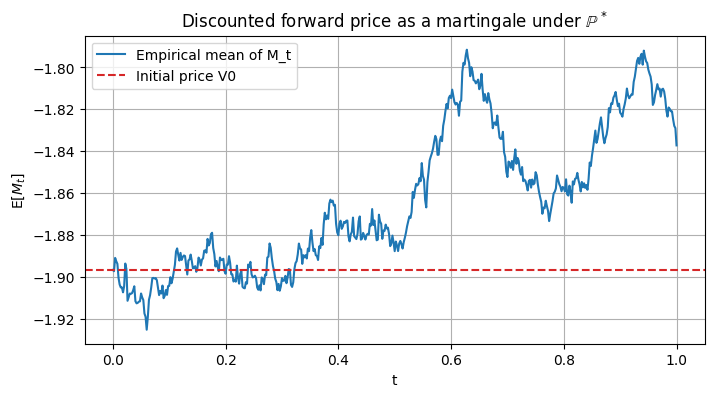

Mean M_0 ≈ -1.8968
Mean M_T ≈ -1.8373


In [12]:
S_disc = np.exp(-r * t) * S_paths  # discounted stock
M_t = S_disc - K * np.exp(-r*T)    # M_t = E^*[\tilde X | F_t] = \tilde S_t - K e^{-rT}

mean_M = M_t.mean(axis=0)

plt.plot(t, mean_M, label="Empirical mean of M_t")
plt.axhline(S0 - K*np.exp(-r*T), color="tab:red", ls="--", label="Initial price V0")
plt.title("Discounted forward price as a martingale under $\mathbb{P}^*$")
plt.xlabel("t")
plt.ylabel("E$[M_t]$")
plt.legend()
plt.show()

print(f"Mean M_0 ≈ {mean_M[0]:.4f}")
print(f"Mean M_T ≈ {mean_M[-1]:.4f}")


The mean of 𝑀𝑡 stays approximately constant and equal to the initial no-arbitrage price 𝑉0, in line with the martingale representation framework.